## FC regression embeddings

In [ ]:
import numpy as np 
#load the umap embeddings
fc_reg_embed=np.load("dl_fc_embedding_list.pickle",allow_pickle=True)

In [ ]:
#load the sequence coordinates
import pandas as pd 
coord_prefix="/mnt/lab_data2/annashch/locusselect/coordinates"
coord_lists=[pd.read_csv(coord_prefix+"/coordinates_"+str(i)+".bed",sep='\t',header=None) for i in range(6)]

In [ ]:
#generate mapping of dataset id to coords/ embeddings 
umap_embeddings_ordering = {
    'RBM38': fc_reg_embed[0],
    'HBA2': fc_reg_embed[1],
    'LMO2': fc_reg_embed[2],
    'HBE1': fc_reg_embed[3],
    'BCL11A': fc_reg_embed[4],
    'MYC': fc_reg_embed[5]
}

sequences_ordering = {
    'BCL11A':coord_lists[0],
    'HBA2':coord_lists[1],
    'HBE1':coord_lists[2],
    'LMO2':coord_lists[3],
    'MYC':coord_lists[4],
    'RBM38':coord_lists[5]}

In [ ]:
#apply clustering to BCL11A
import hdbscan
labels_bcl11a = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(umap_embeddings_ordering['BCL11A'])

labels_hba2 = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(umap_embeddings_ordering['HBA2'])

labels_hbe1 = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(umap_embeddings_ordering['HBE1'])

labels_lm02 = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(umap_embeddings_ordering['LMO2'])

labels_myc = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(umap_embeddings_ordering['MYC'])

labels_rbm38 = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(umap_embeddings_ordering['RBM38'])




In [17]:
## visualize the clusters 

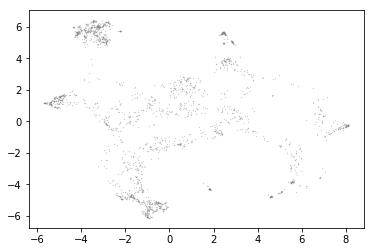

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
#-1 means the regions were not clustered 
clustered_bcl11a = (labels_bcl11a >= 0)
print(plt.scatter(umap_embeddings_ordering['BCL11A'][~clustered_bcl11a, 0],
            umap_embeddings_ordering['BCL11A'][~clustered_bcl11a, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5))


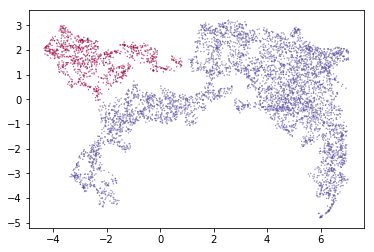

In [9]:
print(plt.scatter(umap_embeddings_ordering['BCL11A'][clustered_bcl11a, 0],
            umap_embeddings_ordering['BCL11A'][clustered_bcl11a, 1],
            c=labels_bcl11a[clustered_bcl11a],
            s=0.1,
            cmap='Spectral'))

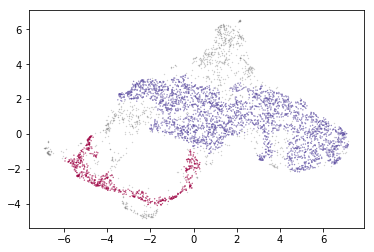

In [15]:
#-1 means the regions were not clustered 
clustered_hba2 = (labels_hba2 >= 0)
print(plt.scatter(umap_embeddings_ordering['HBA2'][~clustered_hba2, 0],
            umap_embeddings_ordering['HBA2'][~clustered_hba2, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5))
print(plt.scatter(umap_embeddings_ordering['HBA2'][clustered_hba2, 0],
            umap_embeddings_ordering['HBA2'][clustered_hba2, 1],
            c=labels_hba2[clustered_hba2],
            s=0.1,
            cmap='Spectral'))

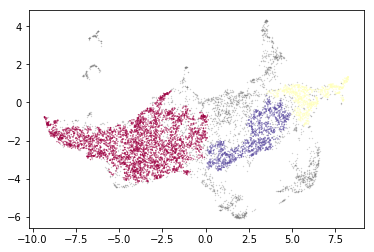

In [16]:
#-1 means the regions were not clustered 
clustered_hbe1 = (labels_hbe1 >= 0)
print(plt.scatter(umap_embeddings_ordering['HBE1'][~clustered_hbe1, 0],
            umap_embeddings_ordering['HBE1'][~clustered_hbe1, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5))
print(plt.scatter(umap_embeddings_ordering['HBE1'][clustered_hbe1, 0],
            umap_embeddings_ordering['HBE1'][clustered_hbe1, 1],
            c=labels_hbe1[clustered_hbe1],
            s=0.1,
            cmap='Spectral'))

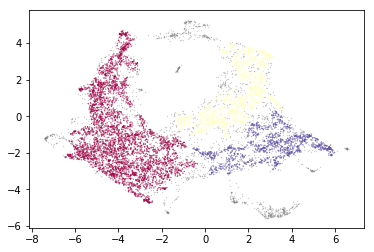

In [19]:
#-1 means the regions were not clustered 
clustered_lm02 = (labels_lm02 >= 0)
print(plt.scatter(umap_embeddings_ordering['LMO2'][~clustered_lm02, 0],
            umap_embeddings_ordering['LMO2'][~clustered_lm02, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5))
print(plt.scatter(umap_embeddings_ordering['LMO2'][clustered_lm02, 0],
            umap_embeddings_ordering['LMO2'][clustered_lm02, 1],
            c=labels_lm02[clustered_lm02],
            s=0.1,
            cmap='Spectral'))

In [14]:
sequences_ordering['BCL11A']['labels']=labels_bcl11a
sequences_ordering['HBA2']['labels']=labels_hba2
sequences_ordering['HBE1']['labels']=labels_hbe1
sequences_ordering['LMO2']['labels']=labels_lm02
sequences_ordering['MYC']['labels']=labels_myc
sequences_ordering['RBM38']['labels']=labels_rbm38

sequences_ordering['BCL11A'].to_csv("BCL11A.labels.bed",sep='\t',header=False,index=False)
sequences_ordering['HBA2'].to_csv("HBA2.labels.bed",sep='\t',header=False,index=False)
sequences_ordering['HBE1'].to_csv("HBE1.labels.bed",sep='\t',header=False,index=False)
sequences_ordering['LMO2'].to_csv("LMO2.labels.bed",sep='\t',header=False,index=False)
sequences_ordering['MYC'].to_csv("MYC.labels.bed",sep='\t',header=False,index=False)
sequences_ordering['RBM38'].to_csv("RBM38.labels.bed",sep='\t',header=False,index=False)
